# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: M Faiq Rofifi
- Email: mfaiqrofifi@gmail.com
- Id Dicoding: faiq_rofifi

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np

### Menyiapkan data yang akan diguankan

## Data Understanding

In [ ]:
df_raw = pd.read_csv("data.csv", sep=";")

df_raw.insert(0, "id", range(1, 1 + len(df_raw)))

df_raw.head()

,id,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,1,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,2,1,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,3,1,1,5,9070,1,1,122.0,1,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,4,1,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,5,2,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


- Dataset berhasil dimuat menggunakan `pandas` dengan pemisah titik koma (`;`). Untuk keperluan identifikasi, kolom tambahan bernama `id` ditambahkan sebagai indeks unik pada setiap baris. Data terdiri dari 38 kolom yang mencakup atribut-atribut penting seperti status pernikahan, mode aplikasi, nilai kualifikasi sebelumnya, hingga kehadiran kuliah pagi/malam. Lima baris pertama ditampilkan untuk memberikan gambaran awal terhadap struktur dan kualitas data.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4424 non-null   int64  
 1   Marital_status                                4424 non-null   int64  
 2   Application_mode                              4424 non-null   int64  
 3   Application_order                             4424 non-null   int64  
 4   Course                                        4424 non-null   int64  
 5   Daytime_evening_attendance                    4424 non-null   int64  
 6   Previous_qualification                        4424 non-null   int64  
 7   Previous_qualification_grade                  4424 non-null   float64
 8   Nacionality                                   4424 non-null   int64  
 9   Mothers_qualification                         4424 non-null   i

- terdapat 4424 row dan 38 column

In [5]:
df_raw.isnull().sum()

id                                              0
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0


- Tidak ada data null

In [6]:
df_raw.duplicated().sum()

np.int64(0)

- Tidak ada data duplicate

## Data Preparation / Preprocessing

In [7]:
categorical_cols = df_raw.select_dtypes(include='object').columns.tolist()
numeric_cols = df_raw.select_dtypes(exclude='object').columns.tolist()

print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numeric_cols)


Categorical Columns:
['Status']

Numerical Columns:
['id', 'Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'G

- mengetahui data numeric dan katagorical
- data categorical ternyata hanya satu yaitu dibagian yang menjadi target atau y

In [ ]:
X = df_raw.drop("Status", axis=1) 
y = df_raw["Status"]               

- Pemisahan data X feature dengan y target

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


- Melakukan transformasi pada kolom kategorikal y

## Modeling

In [10]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

- Split dataset unutk melakukan training dan testing dengan pembagian 20% testing dan 80% training

In [ ]:
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

c:\Users\Faiq\Laskar AI\DS_Terapan\ds_terapan\Lib\site-packages\xgboost\training.py:183: UserWarning: [03:58:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


- Melakukan modelling data menggunakan model xgboost

## Evaluation

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7740112994350282

Confusion Matrix:
 [[215  32  37]
 [ 39  69  51]
 [ 14  27 401]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78       284
           1       0.54      0.43      0.48       159
           2       0.82      0.91      0.86       442

    accuracy                           0.77       885
   macro avg       0.72      0.70      0.71       885
weighted avg       0.76      0.77      0.77       885



1. **Akurasi model mencapai 77.4%**, menunjukkan performa keseluruhan yang cukup baik dalam mengklasifikasikan data ke dalam tiga kelas.
2. **Kinerja terbaik terdapat pada kelas 2**, dengan precision 0.82 dan recall 0.91, menandakan model sangat andal dalam mengenali kelas ini.
3. **Kelas 1 memiliki performa terlemah** dengan F1-score hanya 0.48, menunjukkan potensi masalah ketidakseimbangan data yang perlu ditangani lebih lanjut.

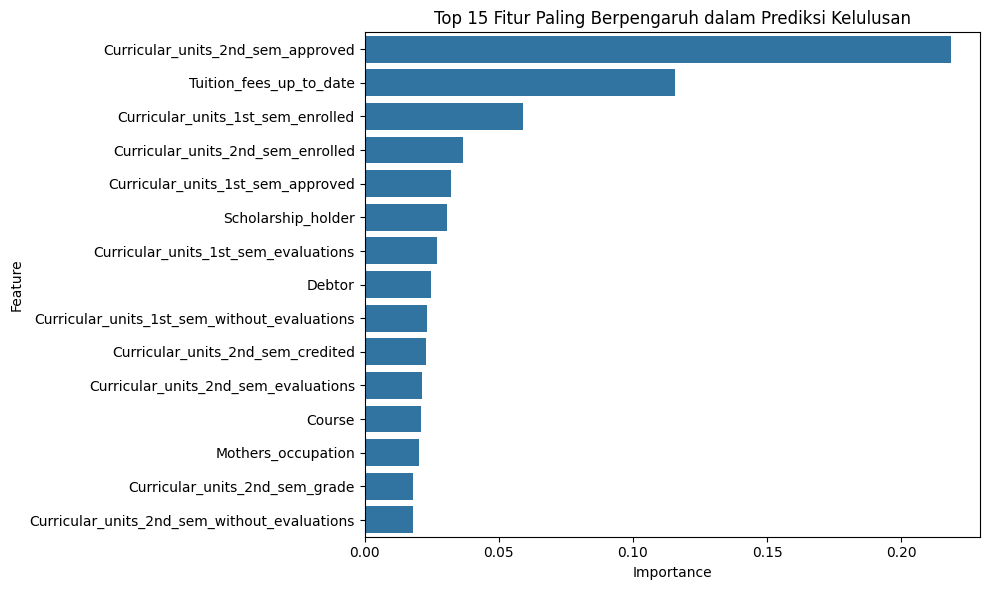

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ambil feature importances dan nama kolomnya
importances = model.feature_importances_
feature_names = X.columns

# Buat DataFrame agar enak divisualisasikan
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 15 fitur terpenting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title("Top 15 Fitur Paling Berpengaruh dalam Prediksi Kelulusan")
plt.tight_layout()
plt.show()


1. **Curricular_units_2nd_sem_approved** menjadi fitur paling dominan dalam model, menunjukkan bahwa jumlah mata kuliah semester 2 yang disetujui sangat menentukan kelulusan mahasiswa.
2. **Tuition_fees_up_to_date** berada di urutan kedua, menandakan bahwa mahasiswa yang membayar biaya kuliah tepat waktu cenderung memiliki peluang lulus lebih tinggi.
3. Fitur-fitur terkait **aktivitas akademik di semester pertama dan kedua** (seperti enrolled, approved, evaluations) juga menunjukkan kontribusi penting, mencerminkan keterlibatan dan performa akademik yang stabil sebagai indikator kelulusan.

In [14]:
top_15_features = [
    "Curricular_units_2nd_sem_approved",
    "Tuition_fees_up_to_date",
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_2nd_sem_enrolled",
    "Scholarship_holder",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_evaluations",
    "Debtor",
    "Curricular_units_2nd_sem_credited",
    "Curricular_units_1st_sem_without_evaluations",
    "Curricular_units_1st_sem_credited",
    "Course",
    "Curricular_units_2nd_sem_evaluations",
    "Mothers_occupation",
    "GDP",
    "Status"  # Target variable
]
data_important = df_raw[top_15_features]
data_important.to_csv("data_important.csv", index=False)

In [15]:
X_train['Status'] = y_train
X_pilih = X_train[top_15_features]

In [20]:
df_do = df_raw[df_raw["Status"] == "Dropout"]
df_do_cleaned = df_do[top_15_features]
df_do_cleaned.to_csv("data_do_cleaned.csv", index=False)

- Melakuakn ekstraksi column yang sangat mempengaruhi target y

In [19]:
df_do.shape

(1421, 38)

In [21]:
import joblib

# Misal model kamu namanya: model
joblib.dump(model, "model_xgboost_dropout.joblib")

['model_xgboost_dropout.joblib']

- Menyimpan model xgboost